In [1]:
import pandas as pd
metrics = pd.read_parquet(
    "/home/martin/oar-deployments/2025-06-20-bench2/154640", engine="pyarrow"
)
metrics

,swhfuse_waiting_graph,swhfuse_get_blob,swhfuse_waiting_storage,swhfuse_not_found,swhfuse_waiting_objstorage
1750449336,11751.369970,2196.0,70.774036,1868.0,423.578045
1750449337,3978.709898,3944.0,111.957461,3235.0,786.831248
1750449338,15281.679639,1332.0,34.789312,1095.0,231.502294
1750449339,1307.057152,1083.0,26.968645,886.0,191.924354
1750449340,207.671714,855.0,20.443198,721.0,124.031226
...,...,...,...,...,...
1750451435,NaN,215.0,2.080516,215.0,NaN
1750451436,NaN,214.0,3.188534,212.0,2.691175
1750451437,14.246866,154.0,3.723382,78.0,91.303294
1750451438,55.234907,129.0,3.636043,32.0,104.123142


In [2]:
xp_length = max(metrics.index) - min(metrics.index)
xp_length
xp_length/3600

1.3077777777777777

In [3]:
for c in metrics.columns:
        print(f"total {c}: " + str(metrics[c].sum()))
for c in metrics.columns:
    print(f"average per process {c}: " + str(metrics[c].sum()/2000))
accessed = metrics["swhfuse_get_blob"].sum() - metrics["swhfuse_not_found"].sum()
print(f"Actually accessed files = {accessed}, ie. {accessed/xp_length}/s")

total swhfuse_waiting_graph: 206681953.256887
total swhfuse_get_blob: 50205986.0
total swhfuse_waiting_storage: 1237197.700409
total swhfuse_not_found: 36207182.0
total swhfuse_waiting_objstorage: 11706922.485720001
average per process swhfuse_waiting_graph: 103340.97662844349
average per process swhfuse_get_blob: 25102.993
average per process swhfuse_waiting_storage: 618.5988502045
average per process swhfuse_not_found: 18103.591
average per process swhfuse_waiting_objstorage: 5853.46124286
Actually accessed files = 13998804.0, ie. 2973.407816482583/s


In [4]:
metrics["swhfuse_not_found"].sum() / metrics["swhfuse_get_blob"].sum()

np.float64(0.7211726107719506)

<Axes: title={'center': 'swh-fuse cumulated waiting times over 2000 processes'}, xlabel='xp time (s)', ylabel='waiting time (s)'>

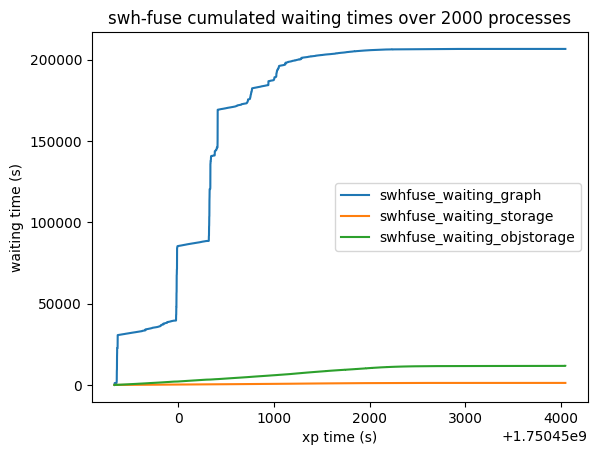

In [5]:
(metrics[
    ["swhfuse_waiting_graph", "swhfuse_waiting_storage", "swhfuse_waiting_objstorage"]
].sort_index().fillna(0.).cumsum() / 1000).plot(title="swh-fuse cumulated waiting times over 2000 processes", xlabel="xp time (s)", ylabel="waiting time (s)")

<Axes: title={'center': 'Number of object access/s'}>

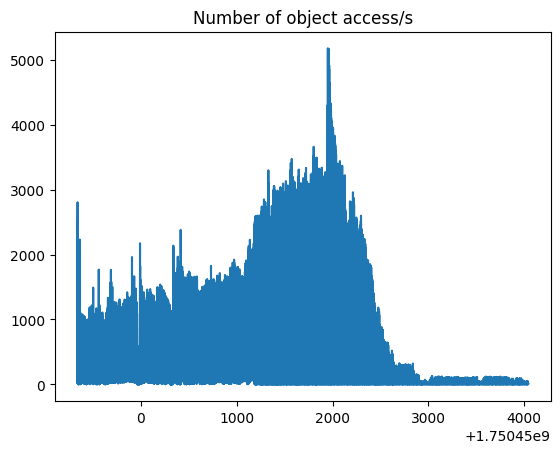

In [6]:
(
    metrics["swhfuse_get_blob"].sort_index().fillna(0.0)
    - metrics["swhfuse_not_found"].sort_index().fillna(0.0)
).plot(title="Number of object access/s")
